## Final Project (Part 3) - Parth Sanghvi - parthss4

# WHERE IS THE STATE OF NEW YORK'S MONEY GOING ?

Importing the necessary libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets
import numpy as np
from ipywidgets import interactive

#### I am using dataset containing Enacted Budget Capital Appropriations by the state of New York for fiscal year 2017-2018.
<img src="nygov-logo-333x333-1-500x383.png" width=400 height=400 />
That year’s Enacted Budget for New York State provided increased resources for education, clean water, affordable housing and other essential programs. The Budget also enacted important policy changes, including raising the age of criminal responsibility and taking other steps to improve the State’s justice system.<br>
The Enacted Budget came at a time when leaders in Washington were considering cuts to federal aid for health care and other services. Given that the State relied on this aid for approximately one-third of its revenues, the unpredictable nature of federal budget and policy discussions presented an elevated concern. The Budget for that year created a process that could be used to address potential reductions during the fiscal year. This approach provided flexibility but also left uncertainty as to how any such adjustments might affect state agencies, local governments, nonprofits and other entities that relied on State funding.<br>
A detailed report of the budget can be found here: <br>https://web.osc.state.ny.us/reports/budget/2017/2017-18-enacted-budget-report.pdf

Dataset Link: https://data.ny.gov/Government-Finance/New-York-State-Enacted-Budget-Capital-Appropriatio/8u5k-2pj5

#### Importing the dataset:

In [2]:
df = pd.read_csv('New_York_State_Enacted_Budget_Capital_Appropriations__2017-2018.csv')
# renaming the columns to simpler names
df.columns = ['Agency Name', 'Ref. No.', 'Program Name', 'State Purpose', 'Fund Name', 'Financing Source', 'Chapter/Section/Year', 'Description', 'Reappropriations', 'Encumbrance', 'Appropriations']

Since the last 3 columns are separate but allotting money to the same entity, we combine all three to create new column called 'Total Budget'. This column summarizes the total amount of money allotted to that particular entity.

In [3]:
df['Total Budget'] = df['Reappropriations'] + df['Encumbrance'] + df['Appropriations']
df.head()

,Agency Name,Ref. No.,Program Name,State Purpose,Fund Name,Financing Source,Chapter/Section/Year,Description,Reappropriations,Encumbrance,Appropriations,Total Budget
0,Adirondack Park Agency,13GI1003,Maintenance & Improvement of Existing Facilities,Preservation of Facilities,Combined Expendable Trust,Miscellaneous Gifts Account,0055/01/10,Miscellaneous Gifts Account,500000,0,0,500000
1,Adirondack Park Agency,13GI1103,Maintenance & Improvement of Existing Facilities,Preservation of Facilities,Combined Expendable Trust,Miscellaneous Gifts Account,0054/01/11,Miscellaneous Gifts Account,500000,0,0,500000
2,Adirondack Park Agency,13GI1203,Maintenance & Improvement of Existing Facilities,Preservation of Facilities,Combined Expendable Trust,Miscellaneous Gifts Account,0054/01/12,Maintenance & Improvement,500000,0,0,500000
3,"Agriculture and Markets, Department of",60010607,New Facilities,New Facilities,Capital Projects Fund,Capital Projects Fund - Authority Bonds,0108/05/06,Food Laboratory,157000,39941,0,196941
4,"Agriculture and Markets, Department of",60010809,New Facilities,New Facilities,Capital Projects Fund,Capital Projects Fund,0053/05/08,Cornell Grape Genomics Research Facilit,43000,42992,0,85992


### Interactive bar plot summarizing count of appropriations:

In [4]:
# Interactive bar plot
# It has 3 parameters: xaxis and c
def fun1(xaxis, c):
    x = df[xaxis].value_counts().index
    y = df[xaxis].value_counts().values
    if xaxis == 'Program Name':         # There are a lot of program names, hence will required a bigger plot
        plt.figure(figsize=(24,8))
    else:
        plt.figure(figsize=(15,8))
    plt.bar(x, y, color = c)
    plt.xticks(rotation=90)
    plt.xlabel(xaxis)
    plt.ylabel('Count')
    plt.title('Appropriations Frequency Distribution among various data points')
    plt.show()


# Creating an interactive plot using 'interactive' function with all the necessary dropdowns
plot1 = interactive(fun1, 
                  xaxis = ipywidgets.Dropdown(
                      value='Agency Name',
                      options=['Agency Name', 'Program Name', 'State Purpose', 'Fund Name', 'Financing Source'],
                      description='x'
                  ),
                   c = ipywidgets.Dropdown(
                      value='red',
                      options=['red', 'blue', 'yellow', 'cyan', 'orange', 'green'],
                      description='Bar Color'
                   )
                  )
plot1


interactive(children=(Dropdown(description='x', options=('Agency Name', 'Program Name', 'State Purpose', 'Fund…

#### This plot will help you understand the distribution of count of appropriations based on data points like 'Agency Name', 'Program Name', 'State Purpose', 'Fund Name' and 'Financing Source'. You can understand the top agencies or top programs or top state purposes that are awarded appropriations based on this plot.

### Interactive bar plot summarizing budget distribution:

In [5]:
# Interactive bar plot
# It has 3 parameters: xaxis, yaxis and c
def fun2(xaxis, yaxis, c):
    x = df[xaxis]
    y = df[yaxis]
    if xaxis == 'Program Name':         # There are a lot of program names, hence will required a bigger plot
        plt.figure(figsize=(24,8))
    else:
        plt.figure(figsize=(15,8))
    plt.bar(x, y, color = c)
    plt.xticks(rotation=90)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title('Budget distribution among various data points')
    plt.show()


# Creating an interactive plot using 'interactive' function with all the necessary dropdowns
plot2 = interactive(fun2, 
                  xaxis = ipywidgets.Dropdown(
                      value='Agency Name',
                      options=['Agency Name', 'Program Name', 'State Purpose', 'Fund Name', 'Financing Source'],
                      description='x'
                  ),
                   yaxis = ipywidgets.Dropdown(
                      value='Total Budget',
                      options=['Total Budget', 'Reappropriations', 'Encumbrance', 'Appropriations'],
                      description='y'
                  ),
                   c = ipywidgets.Dropdown(
                      value='cyan',
                      options=['red', 'blue', 'yellow', 'cyan', 'orange', 'green'],
                      description='Bar Color'
                   )
                  )
plot2

interactive(children=(Dropdown(description='x', options=('Agency Name', 'Program Name', 'State Purpose', 'Fund…

#### This plot is used to understand the distribution of budget based on different data points like 'Agency Name', 'Program Name', 'State Purpose', 'Fund Name' and 'Financing Source'. You can select one of the above mentioned data points for the x-axis of the plot and the distribution will be classified based on that data point. You then have to select the kind of numerical distribution they want to see from: 'Total Budget', 'Appropriations', 'Reapproapriations' and 'Encumbrance'. After this you can select the color of the bars in the plot. The resulting plot will be displayed after all the fields are modified.

### Comparison with previous year's enacted appropriations:

Importing the previous year's (2016-17) dataset and cleaning the data

In [6]:
df1 = pd.read_csv('New_York_State_Enacted_Budget_Capital_Appropriations__2016-2017.csv')
# renaming the columns to simpler names
df1.columns = ['Agency Name', 'Ref. No.', 'Program Name', 'State Purpose', 'Fund Name', 'Financing Source', 'Chapter/Section/Year', 'Description', 'Reappropriations', 'Encumbrance', 'Appropriations']
df1['Total Budget'] = df1['Reappropriations'] + df1['Encumbrance'] + df1['Appropriations']
df1.head()

,Agency Name,Ref. No.,Program Name,State Purpose,Fund Name,Financing Source,Chapter/Section/Year,Description,Reappropriations,Encumbrance,Appropriations,Total Budget
0,Adirondack Park Agency,13GI1003,Maintenance & Improvement of Existing Facilities,Preservation of Facilities,Combined Expendable Trust,Miscellaneous Gifts Account,0055/01/10,Miscellaneous Gifts Account,500000,0,0,500000
1,Adirondack Park Agency,13GI1103,Maintenance & Improvement of Existing Facilities,Preservation of Facilities,Combined Expendable Trust,Miscellaneous Gifts Account,0054/01/11,Miscellaneous Gifts Account,500000,0,0,500000
2,Adirondack Park Agency,13GI1203,Maintenance & Improvement of Existing Facilities,Preservation of Facilities,Combined Expendable Trust,Miscellaneous Gifts Account,0054/01/12,Maintenance & Improvement,500000,0,0,500000
3,"Agriculture and Markets, Department of",60010607,New Facilities,New Facilities,Capital Projects Fund,Capital Projects Fund - Authority Bonds,0108/05/06,Food Laboratory,166000,2018,0,168018
4,"Agriculture and Markets, Department of",60010809,New Facilities,New Facilities,Capital Projects Fund,Capital Projects Fund,0053/05/08,Cornell Grape Genomics Research Facilit,513000,0,0,513000


#### Comparative visualization of Agencies with top budget appropriation in (2017-18) vs (2016 - 17):

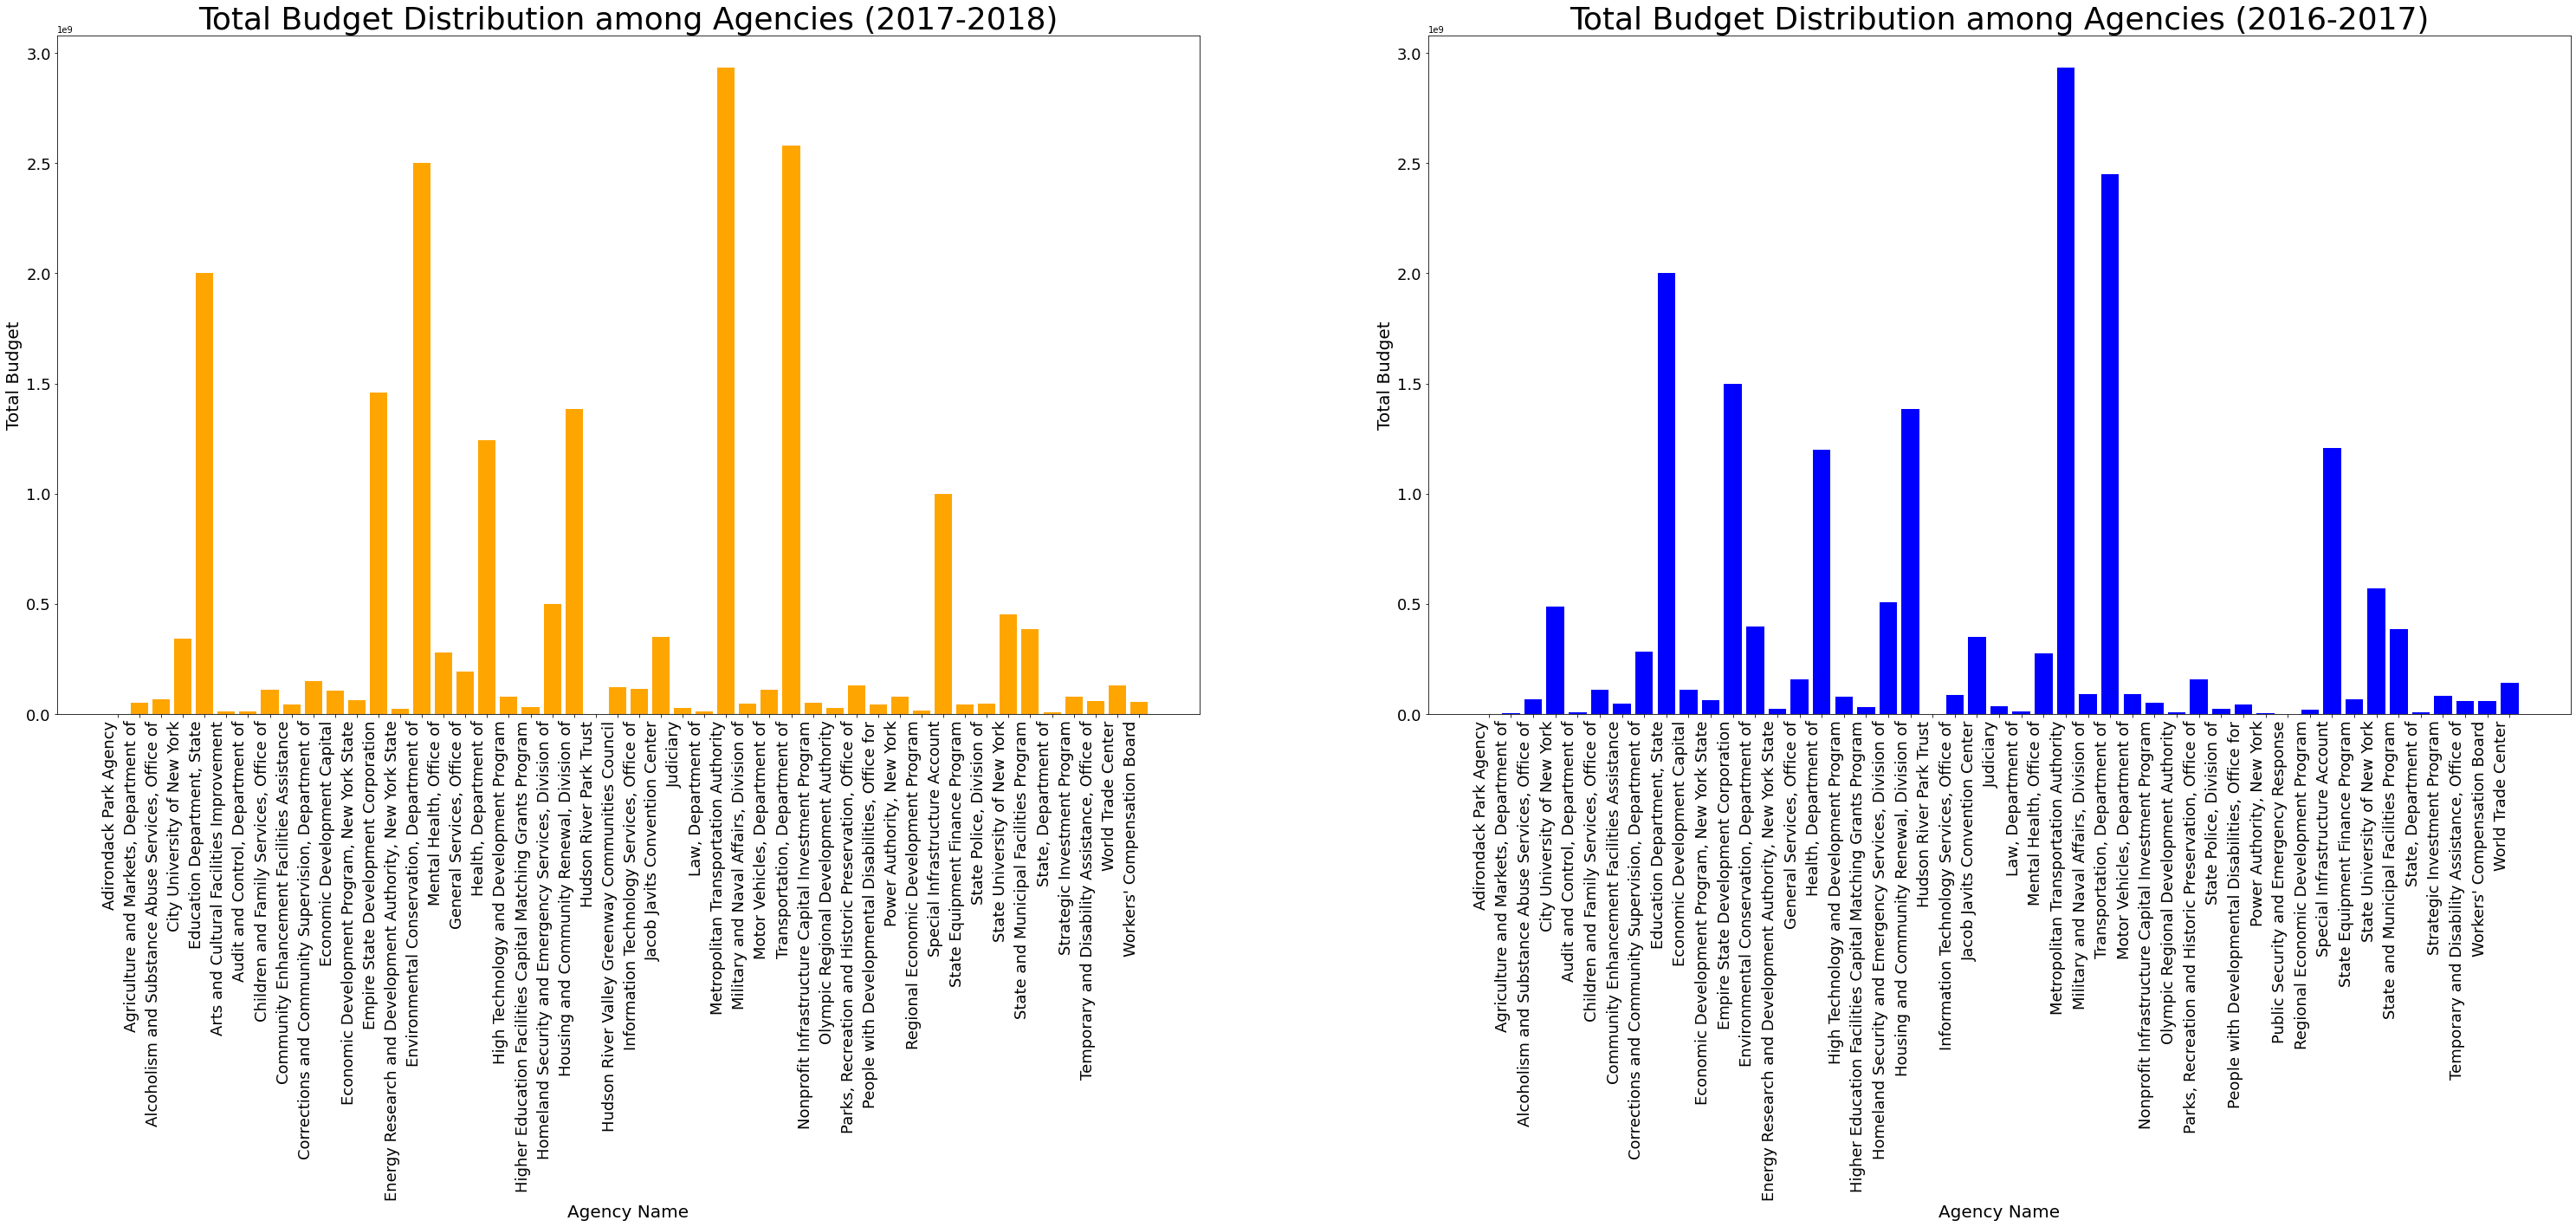

In [7]:
fig = plt.figure(figsize=(52, 16))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(18)
ax1.bar(df['Agency Name'], df['Total Budget'], color='orange')
ax1.set_title('Total Budget Distribution among Agencies (2017-2018)', fontsize=36)
ax1.set_xlabel('Agency Name', fontsize=20)
ax1.set_ylabel('Total Budget', fontsize=20)
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(18)
ax2.bar(df1['Agency Name'], df1['Total Budget'], color='blue')
ax2.set_title('Total Budget Distribution among Agencies (2016-2017)', fontsize=36)
ax2.set_xlabel('Agency Name', fontsize=20)
ax2.set_ylabel('Total Budget', fontsize=20)
fig.autofmt_xdate(rotation=90)
plt.show()

#### We can see from the above bar plots that there was an increase in budget appropriations to 'Environmental Conservation Department' and a decrease in appropriations to 'City of New York'. Other than that, most of the appropriations are pretty similar for both the fiscal years.

### What is happening in the datasets?

I first downloaded the NY state enacted budget capital appropriations (2017-18) dataset in .csv format from state website and rename the columns into simpler formats. I then aggregated the last 3 columns into one 'Total Budget' column for analysis' sake. Each appropriation has different attributes like 'Agency Name', 'Program Name', 'State Purpose', 'Fund Name' and 'Financing Source' along with description of each appropriation. The State has tried to be as transparent as they can by giving so much information about each appropriations. <br><br>
The first interactive plot gives an option to change the x-axis and displays the total number of appropriations present in that category. By default, agency names are displayed on the x-axis along with the frequency of distributions for each category. <br><br>
The second interactive plot gives an option to select x-axis as well as y-axis. x-axis contains categorical variables like agency name and program name whereas y-axis contains numberical variables like Total Budget and Reappropriations. By default, Agency Name is displayed on x-axis and Total Budget is displayed on the y-axis, so we can understand the Total Budget frequency among the Agencies. <br><br>
I wanted to compare the appropriations of 2017-18 with that of 2016-17 to see the change in appropriation patterns. I used a simple bar plot for each fiscal year and then compared the total budget distribution among all the agencies. I noticed that budget appropriation for environmental agencies had tripled. Other than that, most of the appropriations remained pretty similar for both the fiscal years.

### References:
1. Report by State of NY: https://web.osc.state.ny.us/reports/budget/2017/2017-18-enacted-budget-report.pdf
2. New York State Enacted Budget Capital Appropriations: 2017-2018 Dataset:<br>https://data.ny.gov/Government-Finance/New-York-State-Enacted-Budget-Capital-Appropriatio/8u5k-2pj5
3. New York State Enacted Budget Capital Appropriations: 2016-2017 Dataset:<br>https://catalog.data.gov/dataset/new-york-state-enacted-budget-capital-appropriations-2016-2017
4. New York State Image: https://images.app.goo.gl/BspPw9yFpvC16tpn8